In [3]:
%matplotlib inline
%load_ext Cython

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cython
from pathlib import Path
from os.path import join
from IPython.display import display_markdown
import glob
sns.set()

import platform

if platform.system() == 'Darwin':
    %config InlineBackend.figure_format = 'retina'


In [4]:
def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(path + '.gz', *args, **kwargs)
    except: 
        return pd.read_csv(path, *args, **kwargs)

In [5]:
path = "../../../data/bm-fit-nfix-notp-norep-2019-01-09-1437/canonical_bm/run_09/rep00/"
gen = 4999
for curpath in sorted(glob.iglob(path, recursive=True)):
    print(curpath)
    log = read_csvx(curpath + '/analysis_log_4999.txt', delimiter="\t")
    log
    break

../../../data/bm-fit-nfix-notp-norep-2019-01-09-1437/canonical_bm/run_09/rep00/


In [6]:
log['onOpp'] = (log["oppId"] == 0)

In [8]:
meantime2 = log.query('oppNb == 2').groupby(['ind','oppCoop'], as_index=False).mean()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


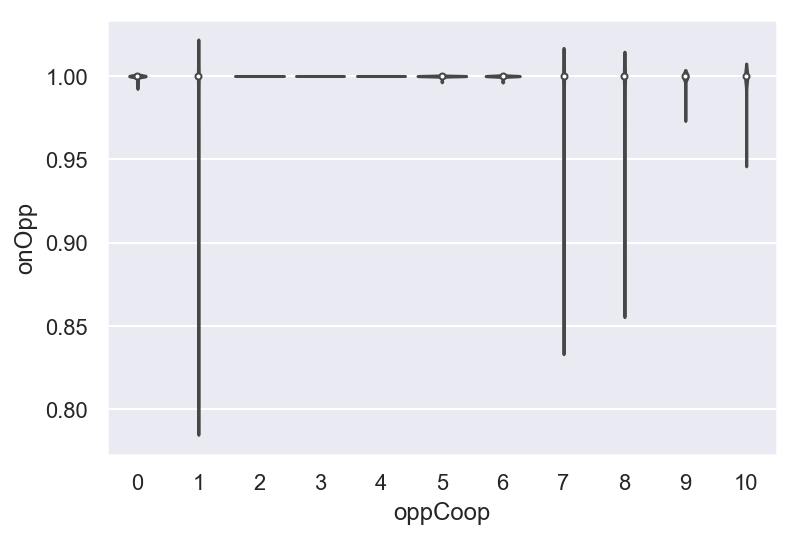

In [9]:
sns.violinplot(x='oppCoop', y='onOpp', data=meantime2)